In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

from scipy.stats import norm

# Let's first generate some synthetic data

### Generate 4 basis Gaussians

(-0.050000000000000003, 1.05, -0.19946496527279667, 4.1887656074229564)

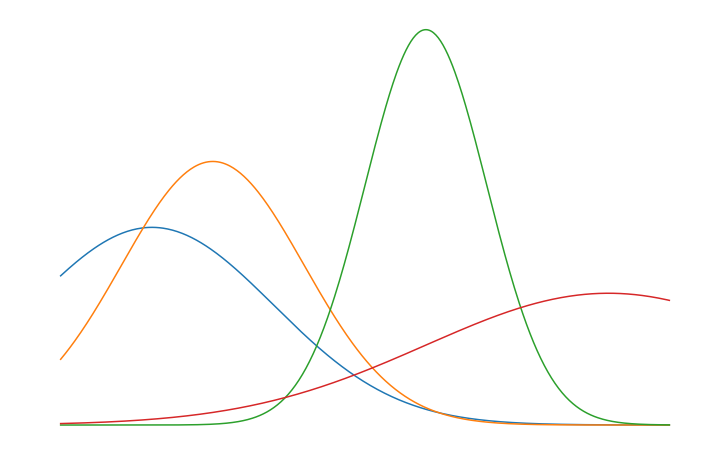

In [20]:
t = np.linspace(0, 1, 512)

mus = [.15, .25, .6, .9]
sigmas = [.2, .15, .1, .3]

G = []

for mu,sigma in zip(mus, sigmas):
    G.append( norm.pdf(t, mu, sigma) )

G = np.array(G).T

fig = plt.figure(figsize=(12, 8))

#print([m for m in dir(fig) if 'ax' in m])

for g_k in G.T:
    ax = plt.plot(t, g_k)

plt.axis('off')
    
#plt.xlabel("$ t $", size=16)
#plt.ylabel("$ g_k $", size=16)

### Generate X

In [21]:
N = 2**12

print("generating", N, "samples")

d = G.shape[1]

print(d, "basis functions chosen")

m = G.shape[0]

nu = np.random.rand(*(N, d))

X = nu @ G.T

print("X generated")

generating 4096 samples
4 basis functions chosen
X generated


### Visualize X

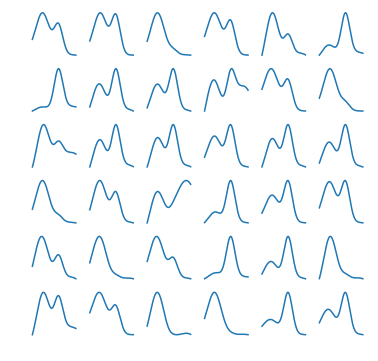

In [23]:
fig = plt.figure()

N_plot = 36
sN_plot = int(np.sqrt(N_plot))
assert N_plot%sN_plot == 0, "Enter a square value to plot"

fdim = max(sN_plot, 5)
plt.figure(figsize=(fdim, fdim))

for i in range(N_plot):
    
    sp = plt.subplot(fdim, fdim, i+1)
    sp.set_axis_off()
    #print([s for s in dir(sp) if ("axis" in s)]); break
    
    plt.plot(X[i])

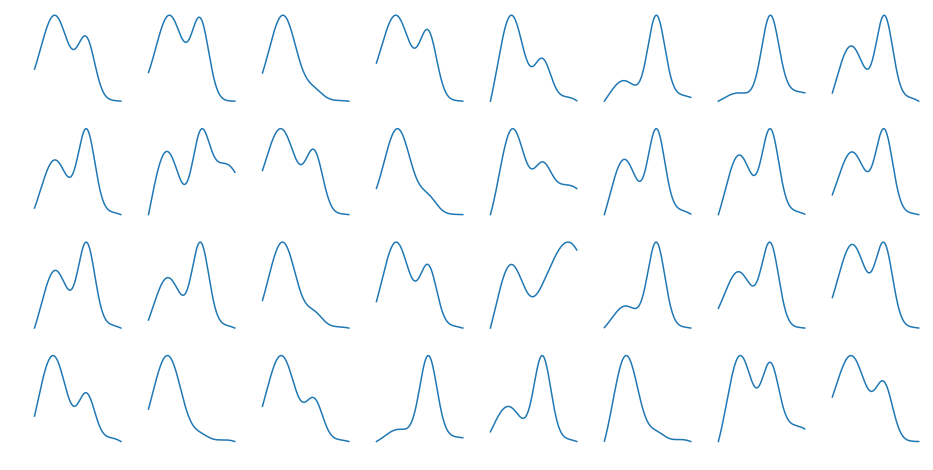

In [26]:
N_rows = 4
N_cols = 8

plt.figure(figsize=(N_cols*2, N_rows*2))

for i in range(N_rows*N_cols):
    
    sp = plt.subplot(N_rows, N_cols, i+1)
    sp.set_axis_off()
    plt.plot(X[i])

# Create the algorithm

In [ ]:
class NMF():
    
    def __init__(self, d=4):
        self.hidden_dim_ = d
        
    def fit(self, X, n_steps=64, loss_patience=4):
        
        ### initialize
        W = np.random.rand(*(X.shape[0], self.hidden_dim_))
        V = np.random.rand(*(self.hidden_dim_, X.shape[1]))
        
        ### Run algo
        # vars
        min_loss = ((X - W @ V)**2).mean(axis=(0,1))
        loss_counter = loss_patience
        W_min, V_min = W, V
        loss = []
        # loop        
        for _ in range(n_steps):
            # Update W, V
            W_ = W * (X @ V.T) / (W @ V @ V.T)
            V_ = V * (W.T @ X) / (W.T @ W @ V)
            # Store W, V
            W, V = W_, V_
            # Account for loss 
            loss.append( ((X - W @ V)**2).mean(axis=(0,1)) ) 
            # Update loss counter
            if loss[-1] < min_loss:
                W_min, V_min = W, V
                loss_counter = loss_patience
            else:
                loss_counter -= 1
            # Break if loss patience is up
            if loss_counter <= 0:
                break
        
        # store variable pointers
        self.data_ = X
        self.features_ = W_min
        self.coefficients_ = V_min
        self.loss_ = loss
    
    @property
    def reconstruction():
        return self.features_ @ self.coefficients_
       
    @property
    def MSE():
        return ((self.data_ - self.features_ @ self.coefficients_)**2).mean(axis=(0,1))
    

In [ ]:
model = NMF(d=4)

model.fit(X.T, n_steps=2**8, loss_patience=4)

plt.plot(model.loss_)

print(len(model.loss_))

In [ ]:
plt.plot(model.features_)